## Linear regression model with TensorFlow

 Write a program to create a random 50 data points (X,Y)  plot data points and add some noise in data set and apply linear regression use epoch=100 and check the result ,epoch=500 check result and plot graph.

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
np.random.seed(101)
tf.set_random_seed(101)

In [ ]:
x = np.linspace(0,50,50)
y = np.linspace(0,50,50)

In [ ]:
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4,4,50)

In [ ]:
n = len(x)
n

50

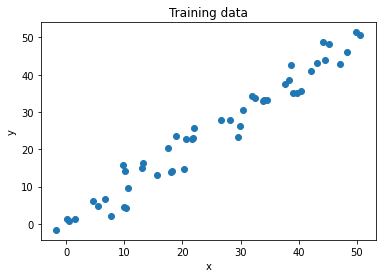

In [ ]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training data")
plt.show()

In [ ]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [ ]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [ ]:
learning_rate = 0.01
training_epochs = 1000

In [ ]:
y_pred = tf.add(tf.multiply(X,W),b)

In [ ]:
cost = tf.reduce_sum(tf.pow(y_pred - Y, 2))/ (2*n)

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
  
  sess.run(init)

  for epoch in range(training_epochs):

    for(_x, _y) in zip(x,y):
      sess.run(optimizer,feed_dict = {X: _x, Y: _y})
               
    if (epoch + 1) % 50 == 0:
      c = sess.run(cost,feed_dict = {X : x, Y: y })
      print("Epoch",(epoch + 1),":cost =", c , "W =",sess.run(W), "b =", sess.run(b))
  
  training_cost = sess.run(cost, feed_dict = {X : x,Y: y})
  weight = sess.run(W)
  bias = sess.run(b)

Epoch 50 :cost = 5.8868036 W = 0.9951241 b = 1.238105
Epoch 100 :cost = 5.79127 W = 0.99812365 b = 1.0914395
Epoch 150 :cost = 5.7119684 W = 1.0008028 b = 0.96044284
Epoch 200 :cost = 5.6459413 W = 1.0031956 b = 0.84343934
Epoch 250 :cost = 5.5907993 W = 1.0053328 b = 0.7389355
Epoch 300 :cost = 5.544608 W = 1.007242 b = 0.6455921
Epoch 350 :cost = 5.5057893 W = 1.008947 b = 0.56221986
Epoch 400 :cost = 5.473066 W = 1.01047 b = 0.48775342
Epoch 450 :cost = 5.445385 W = 1.0118302 b = 0.42124158
Epoch 500 :cost = 5.4219036 W = 1.0130452 b = 0.36183482
Epoch 550 :cost = 5.4019227 W = 1.0141305 b = 0.30877408
Epoch 600 :cost = 5.3848557 W = 1.0150996 b = 0.2613811
Epoch 650 :cost = 5.370246 W = 1.0159653 b = 0.21905078
Epoch 700 :cost = 5.3576994 W = 1.0167387 b = 0.18124203
Epoch 750 :cost = 5.3468933 W = 1.0174294 b = 0.14747237
Epoch 800 :cost = 5.337558 W = 1.0180461 b = 0.11730931
Epoch 850 :cost = 5.3294754 W = 1.0185971 b = 0.090368524
Epoch 900 :cost = 5.322459 W = 1.0190892 b = 0.

In [ ]:
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, "\n")

Training cost = 5.3110332 Weight = 1.0199214 bias = 0.02561658 



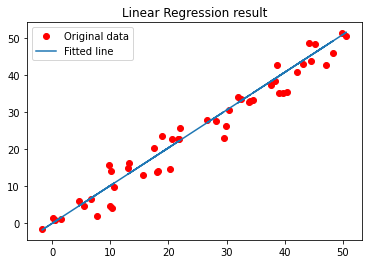

In [ ]:
#Result
plt.plot(x,y,'ro',label = "Original data")
plt.plot(x, predictions, label = "Fitted line" )
plt.title("Linear Regression result")
plt.legend()
plt.show()


<br><br><br><strong>Assignment 2</strong>: Write a program to creating a Linear Regression Model as an ANN with TensorFlow by using following data set.

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Bias_correction_ucl.csv")
data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
#Taking 100 data points of Present_Tmin in x and LDAPS_RHmin in y 
x = data['Present_Tmin'][:100]
y = data['LDAPS_RHmin'][:100]

In [ ]:
n = len(x)
n

100

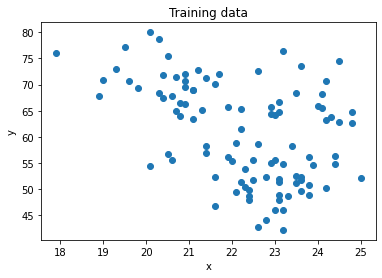

In [ ]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training data")
plt.show()

In [ ]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [ ]:
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [ ]:
learning_rate = 0.01
training_epochs = 1000

In [ ]:
y_pred = tf.add(tf.multiply(X,W),b)

In [ ]:
cost = tf.reduce_sum(tf.pow(y_pred - Y, 2))/ (2*n)

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [ ]:
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as sess:
  
  sess.run(init)

  for epoch in range(training_epochs):

    for(_x, _y) in zip(x,y):
      sess.run(optimizer,feed_dict = {X: _x, Y: _y})
               
    if (epoch + 1) % 50 == 0:
      c = sess.run(cost,feed_dict = {X : x, Y: y })
      print("Epoch",(epoch + 1),":cost =", c , "W =",sess.run(W), "b =", sess.run(b))
  
  training_cost = sess.run(cost, feed_dict = {X : x,Y: y})
  weight = sess.run(W)
  bias = sess.run(b)

Epoch 50 :cost = 105.91285 W = 3.0807202 b = -0.031271797
Epoch 100 :cost = 105.63724 W = 3.0682862 b = 0.23169485
Epoch 150 :cost = 105.36249 W = 3.0558763 b = 0.49413425
Epoch 200 :cost = 105.08895 W = 3.0434916 b = 0.7560488
Epoch 250 :cost = 104.81652 W = 3.0311317 b = 1.0174397
Epoch 300 :cost = 104.5451 W = 3.0187964 b = 1.278306
Epoch 350 :cost = 104.27492 W = 3.0064864 b = 1.5386484
Epoch 400 :cost = 104.00562 W = 2.9942 b = 1.7984744
Epoch 450 :cost = 103.73752 W = 2.981939 b = 2.0577762
Epoch 500 :cost = 103.470505 W = 2.9697025 b = 2.3165643
Epoch 550 :cost = 103.20443 W = 2.9574904 b = 2.5748208
Epoch 600 :cost = 102.93957 W = 2.945303 b = 2.8325703
Epoch 650 :cost = 102.675674 W = 2.9331396 b = 3.0898042
Epoch 700 :cost = 102.41286 W = 2.921001 b = 3.346521
Epoch 750 :cost = 102.15107 W = 2.908886 b = 3.602728
Epoch 800 :cost = 101.8903 W = 2.8967953 b = 3.858423
Epoch 850 :cost = 101.630684 W = 2.8847291 b = 4.1136065
Epoch 900 :cost = 101.37187 W = 2.8726857 b = 4.368296

In [ ]:
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, "\n")

Training cost = 100.85767 Weight = 2.8486733 bias = 4.8761177 



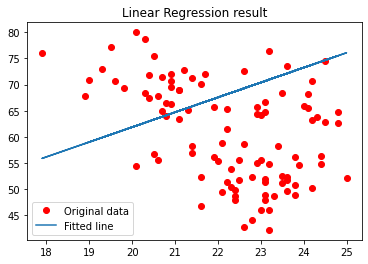

In [ ]:
#Result
plt.plot(x,y,'ro',label = "Original data")
plt.plot(x, predictions, label = "Fitted line" )
plt.title("Linear Regression result")
plt.legend()
plt.show()
